## Assignment - Practice Chi-square Tests

###Dataset description:

Slasher movies thrill audiences by portraying a lone antagonist (typically male) who attacks innocent victims with extreme violence and without apparent motive. However, this exciting (if gory) subgenre of horror film is criticized by those who view the violence as being used to “punish” female characters who engage in sexual activity during the film. To test this claim, study authors randomly sampled 50 North American slasher films released from 1960 to 2009 and coded the 485 characters appearing in them as being male or female, involved in sexual activity or not, and if they survived the film or not1. The data appears in the Slasher.csv dataset. In this project, we are going to answer a slightly simpler question: Are female characters in slasher films more likely to be "murdered" than male characters?

Source: A. Welsh (2010). "On the Perils of Living Dangerously in the Slasher Horror Film: Gender Differences in the Association Between Sexual Activity and Survival," Sex Roles, Vol. 62 pp. 762-773

You can find the Slasher.csv file here:

<https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv>





### 1) Load the Slasher.csv dataset in a new dataframe.



In [2]:
# YOUR WORK HERE

import pandas as pd

url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv'

slasher = pd.read_csv(url)

###2) Display the top 5 rows of the dataframe to take a look at the variable names and values.

In [3]:
# YOUR WORK HERE

slasher.head()

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


The variable codes are:

ID = Character ID

Gender = Character gender.  0 = female, 1 = male

Activity = Character was portrayed as engaged in sexual activity.  0 = no, 1 = yes

Survival = Character survival in the film. 0 = did not survive, 1 = survived

###3) Calculate the frequency and relative frequency of male and female characters in this set of slasher films.  Describe your results in a sentence or two.

In [13]:
# YOUR WORK HERE

gender = pd.crosstab(index=slasher["Gender"], columns="count")
gender


col_0,count
Gender,
0,263
1,222


In [14]:
gender/gender.sum()*100

col_0,count
Gender,
0,54.226804
1,45.773196


There appears to be a larger amount of female characters than male characters in slasher films.

###4) Calculate the frequency and relative frequency of character survival in this set of slasher films.  Describe your results in a sentence or two.

In [15]:
survival = pd.crosstab(index=slasher["Survival"], columns="count")
survival

col_0,count
Survival,
0,400
1,85


In [16]:
survival/survival.sum()*100

col_0,count
Survival,
0,82.474227
1,17.525773


There appears to be a much higher amount of people in slasher films that do not survive compared to the amount of people in slasher films that do surviva.

###5) Calculate the joint distribution of character sex and movie survival. Add the table margins.  

Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [21]:
# YOUR WORK HERE

cross = pd.crosstab(slasher['Gender'],slasher['Survival'],margins=True)
cross

Survival,0,1,All
Gender,,,
0,228,35,263
1,172,50,222
All,400,85,485


In [20]:
cross/cross.sum()*100

Survival,0,1,All
Gender,,,
0,28.5,20.588235,27.113402
1,21.5,29.411765,22.886598
All,50.0,50.000000,50.000000


Although there are more females than males, the ratio between the survival of males and the survival of females shows that females are more often to die than males in slasher movies.

###6) Calculate the distribution of survival conditional on character sex.
Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [23]:
pd.crosstab(slasher['Gender'],slasher['Survival'],normalize="index")*100

Survival,0,1
Gender,,
0,86.692015,13.307985
1,77.477477,22.522523


Females have a 13 % chance of not dying in slasher movies, while males have
a 22.5% chance of not dying. This shows that the percentage of women dying
in Slasher movies is higher than males.

###7) Identify the appropriate null and alternative hypotheses to test for a statistically significant relationship between character sex and survival. 

**Ho:** There is no correlation between the sex of the character and their survival chance in slasher movies.

**Ha:** There is a correlation between the sex of the character and their survival chance in slasher movies.

### 8) Perform the chi-square test above using `stats.chi2_contingency()` and output the p-value.


In [24]:
# YOUR WORK HERE
from scipy.stats import chi2_contingency
g, p, dof, expctd = chi2_contingency(pd.crosstab(slasher['Gender'],slasher['Survival']))

In [25]:
p

0.011104692591139975

### 9) Interpret your p-value in 8) at the 0.05 significance level, and summarize your results in a sentence or two.

Since the P value is below the significance level, we reject the hypothesis that there is no correlation between character sex and their chances of surviving in slasher movies. Instead, we go to the alternate hypothesis, that states that there is a correlation between the character's gender and their survival chance during the movie.

### 10) Create a side-by-side bar plot to illuatrate the relationship between character sex and survival in Slasher movies.  Sum up your overall results in a sentence or two.

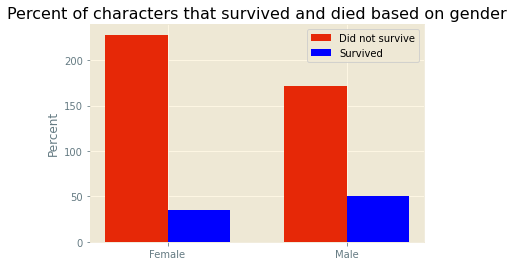

In [36]:
# YOUR WORK HERE

import matplotlib.pyplot as plt
import numpy as np

N = 2 #Needed for graphing purposes


Died = (228, 172) # Percent that died in the slasher movie, in order of gender (female, male)
Survived = (35, 50) #Percent that survived in the slasher movie, in order of gender (female, male)

#This is more graphical stuff
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

#Create the plot
fig, ax = plt.subplots()
plt.style.use('Solarize_Light2')
rects1 = ax.bar(ind, Died, width, color='#e62807') #bars for died
rects2 = ax.bar(ind + width, Survived, width, color='b') #bars for survived


fig.set_facecolor('w')
# add some text for labels, title and axes ticks
ax.set_ylabel('Percent')
ax.set_title('Percent of characters that survived and died based on gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Female', 'Male'))

ax.legend((rects1[0], rects2[0]), ('Did not survive', 'Survived'))

plt.show()


Female characters have a higher possibility to dying in slasher films compared to male characters. 



## Stretch Goals:

###1. Explore the concept of an odds ratio

Another way to quantify the relationship between two categorical variables is by calculating the odds ration, which is the ratio of the odds of an event happening in one group to the odds of the event happening in another group.

[Lots more about the odds ratio](https://en.wikipedia.org/wiki/Odds_ratio).

We can use Python to calculate the odds of surviving a slaser movie for female compared to male characters.

You can find more information about calculating the odds ratio for a 2x2 table in Python [here](https://www.statsmodels.org/stable/contingency_tables.html).  Scroll down to the section labeled "A Single 2x2 Table".

Calculate the odds ratio comparing the odds of movie survival in female compared to male characters.  Interpret what this number tells you about the likelihood of male and female characters surviving the film.


In [ ]:
# YOUR WORK HERE

Sum up your results in a sentence or two.


### 2. Learn about Simpson's Paradox

[Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20goes%20by,when%20these%20groups%20are%20combined.) occurs when a trend that appears in separate groups disappears or reverses when those groups are combined.  

Create a scenario where Hopsital A has a lower overall mortality rate than Hospital B but has a higher mortality rate if cases are separated into two groups: high risk and low risk.


In [ ]:
# YOUR WORK HERE

Sum up your results in a sentence or two.